In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Overview of Dataset

In [4]:
spot_df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
spot_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [3]:
spot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [4]:
missing_data = spot_df.isnull().sum()
missing_data

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

#### Basic Descriptive Statistics

In [35]:
spot_df['streams'] = pd.to_numeric(spot_df['streams'], errors='coerce')
spot_df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.520000e+02,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.141374e+08,67.812172,51.908709,100.643232,2.666317,48.115425,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.668569e+08,86.441493,50.630241,173.887239,6.035599,123.242346,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.416362e+08,13.000000,7.000000,9.000000,0.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.905309e+08,34.000000,38.000000,31.000000,0.000000,2.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738690e+08,88.000000,87.000000,100.000000,2.000000,32.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,974.000000,58.000000,953.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [37]:
median = int(spot_df['streams'].median())
print(f'The median is {median} streams.')
median_row = spot_df.loc[spot_df['streams'] == median, ['artist(s)_name', 'track_name', 'streams']]
# If no exact match, find the row closest to the median
if median_row.empty:
    sorted_spot_df = spot_df.sort_values(by='streams').reset_index(drop=True)
    closest_index = (sorted_spot_df['streams'] - median).abs().idxmin()
    median_row = sorted_spot_df.loc[[closest_index], ['artist(s)_name', 'track_name', 'streams']]
    
print(f'The closest streams to the median is the track name "Every Summertime" by NIKI.')
median_row

The median is 290530915 streams.
The closest streams to the median is the track name "Every Summertime" by NIKI.


,artist(s)_name,track_name,streams
475,NIKI,Every Summertime,290228626.0


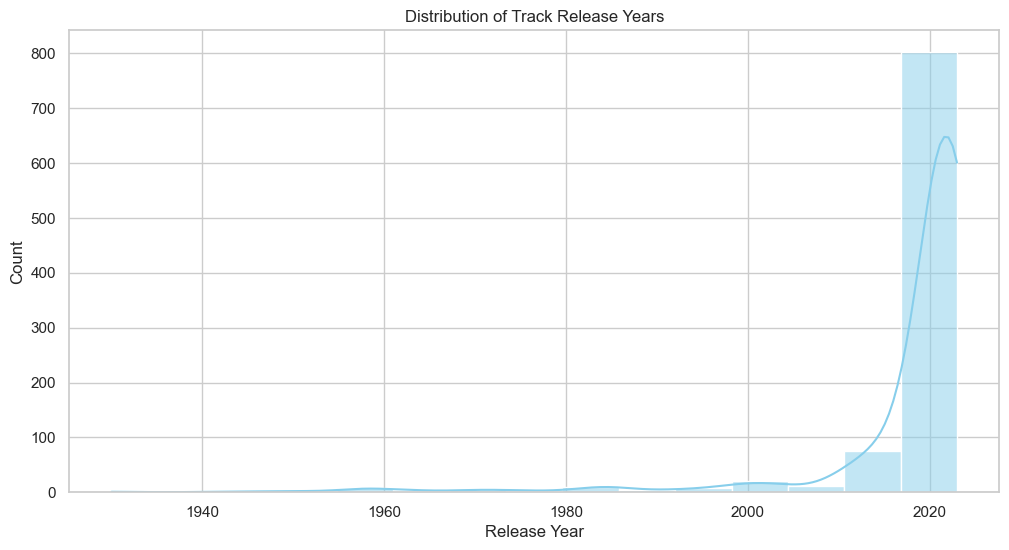

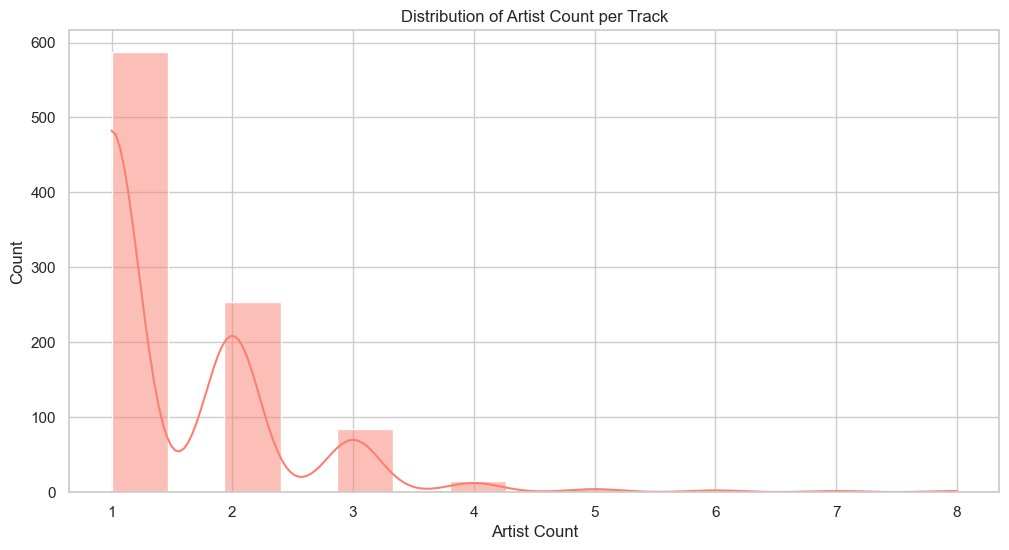

In [9]:
sns.set(style="whitegrid")

# Plot distribution of 'released_year'
plt.figure(figsize=(12, 6))
sns.histplot(spot_df['released_year'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Track Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

# Plot distribution of 'artist_count'
plt.figure(figsize=(12, 6))
sns.histplot(spot_df['artist_count'], bins=15, kde=True, color='salmon')
plt.title('Distribution of Artist Count per Track')
plt.xlabel('Artist Count')
plt.ylabel('Count')
plt.show()

####  Top Performer

In [38]:
top_tracks = spot_df.nlargest(5, 'streams')[['artist(s)_name','track_name', 'streams',]]
top_tracks

,artist(s)_name,track_name,streams
55,The Weeknd,Blinding Lights,3.703895e+09
179,Ed Sheeran,Shape of You,3.562544e+09
86,Lewis Capaldi,Someone You Loved,2.887242e+09
620,Tones and I,Dance Monkey,2.864792e+09
41,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,2.808097e+09


In [9]:
top_artists = spot_df['artist(s)_name'].value_counts().head(5)
top_artists

artist(s)_name
Taylor Swift    34
The Weeknd      22
Bad Bunny       19
SZA             19
Harry Styles    17
Name: count, dtype: int64

#### Temporal Trends

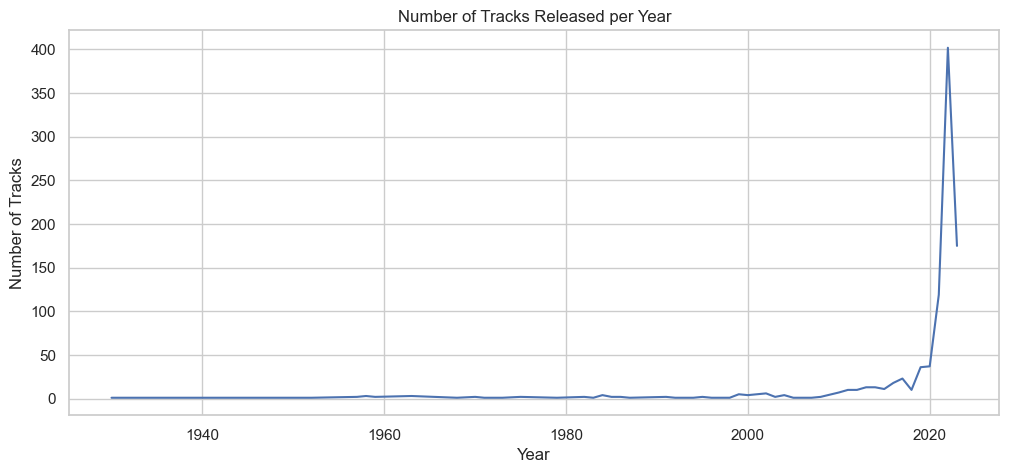

In [10]:
tracks_per_year = spot_df['released_year'].value_counts().sort_index()
plt.figure(figsize=(12, 5))
sns.lineplot(x=tracks_per_year.index, y=tracks_per_year.values)
plt.title('Number of Tracks Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.show()

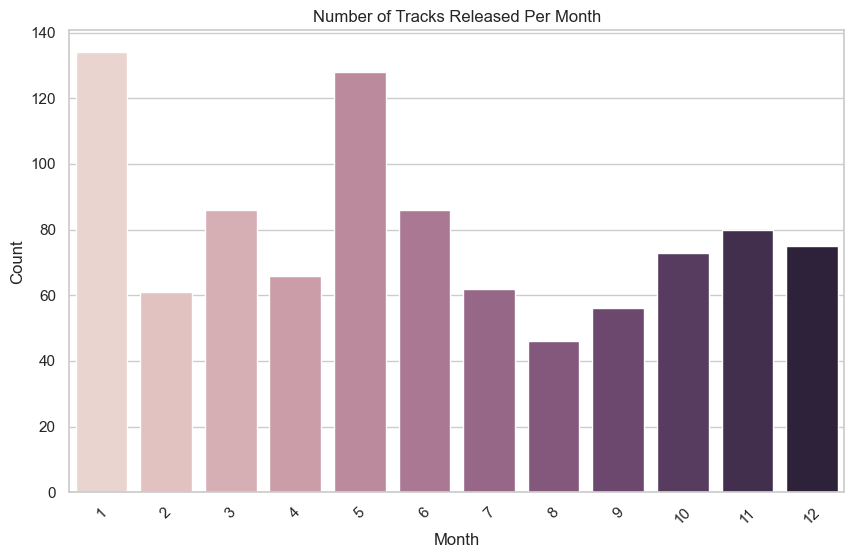

In [11]:
monthly_releases = spot_df['released_month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_releases.index, y=monthly_releases.values, hue=monthly_releases.index, dodge=False, legend=False)
plt.title('Number of Tracks Released Per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

####  Genre and Music Characteristics

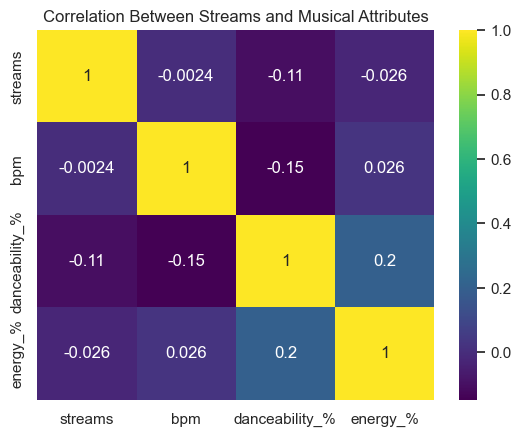

In [12]:
correlation_matrix = spot_df[['streams', 'bpm', 'danceability_%', 'energy_%']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Between Streams and Musical Attributes')
plt.show()

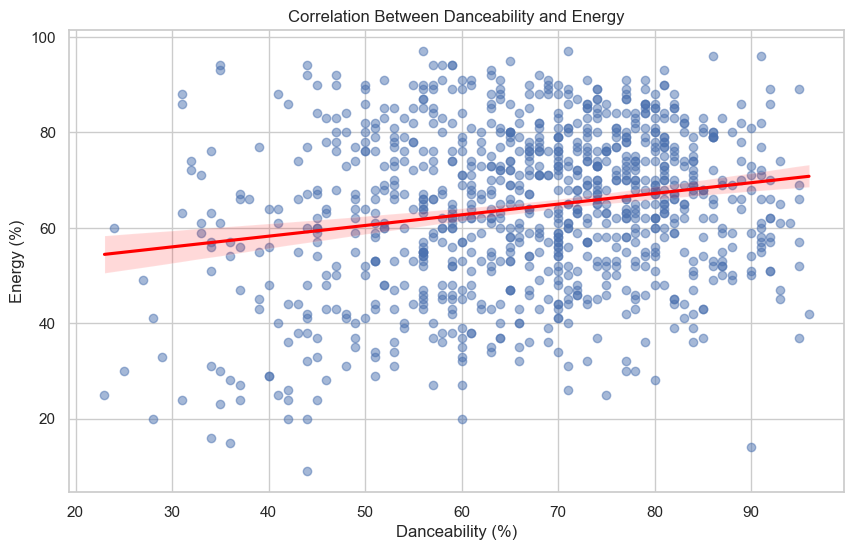

In [39]:
plt.figure(figsize=(10, 6))
sns.regplot(x='danceability_%', y='energy_%', data=spot_df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Correlation Between Danceability and Energy')
plt.xlabel('Danceability (%)')
plt.ylabel('Energy (%)')
plt.show()

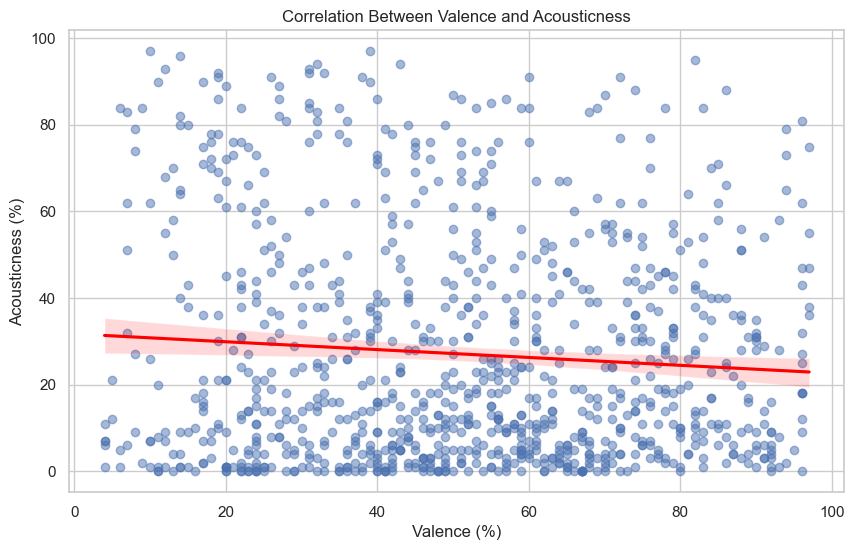

In [14]:
plt.figure(figsize=(10, 6))
sns.regplot(x='valence_%', y='acousticness_%', data=spot_df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Correlation Between Valence and Acousticness')
plt.xlabel('Valence (%)')
plt.ylabel('Acousticness (%)')
plt.show()

#### Platform Popularity

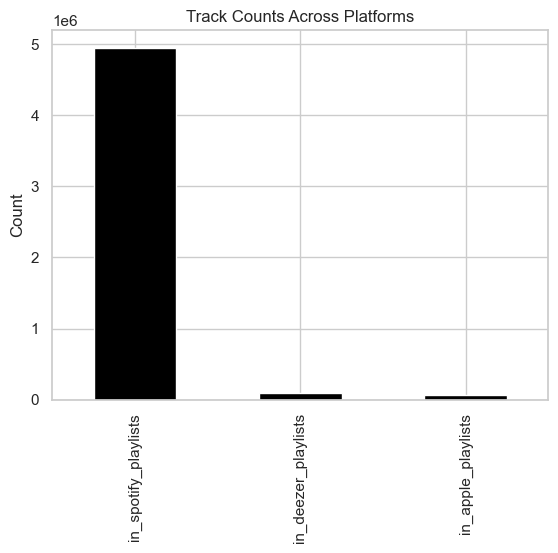

In [11]:
spot_df['in_deezer_playlists'] = pd.to_numeric(spot_df['in_deezer_playlists'], errors='coerce').fillna(0).astype(int)
platforms = ['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']
platform_counts = spot_df[platforms].sum()
platform_counts.plot(kind='bar', title='Track Counts Across Platforms', color='black')
plt.ylabel('Count')
plt.show()

#### Advanced Analysis

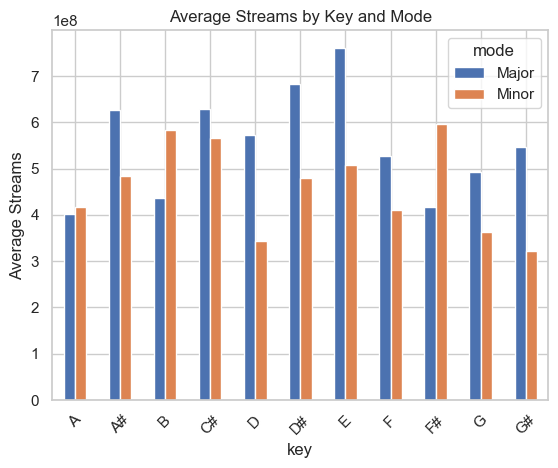

In [65]:
key_mode_analysis = spot_df.groupby(['key', 'mode'])['streams'].mean().unstack()
key_mode_analysis.plot(kind='bar', title='Average Streams by Key and Mode')
plt.ylabel('Average Streams')
plt.xticks(rotation=45)
plt.show()

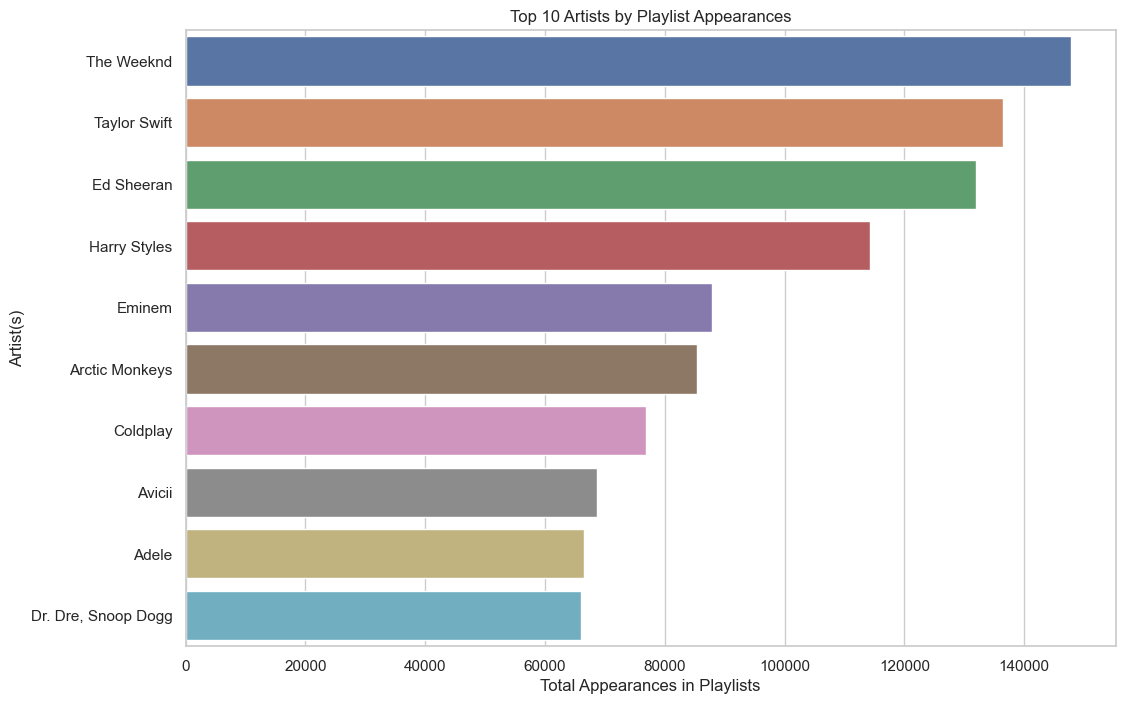

In [10]:
playlist_columns = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']


artist_playlist_counts = spot_df.groupby('artist(s)_name')[playlist_columns].sum()


artist_playlist_counts['total_playlist_appearances'] = artist_playlist_counts.sum(axis=1)


top_playlist_artists = artist_playlist_counts.sort_values(by='total_playlist_appearances', ascending=False).head(10)


plt.figure(figsize=(12, 8))
sns.barplot(y=top_playlist_artists.index, x=top_playlist_artists['total_playlist_appearances'], hue=top_playlist_artists.index, dodge=False, legend=False)
plt.title('Top 10 Artists by Playlist Appearances')
plt.xlabel('Total Appearances in Playlists')
plt.ylabel('Artist(s)')
plt.show()

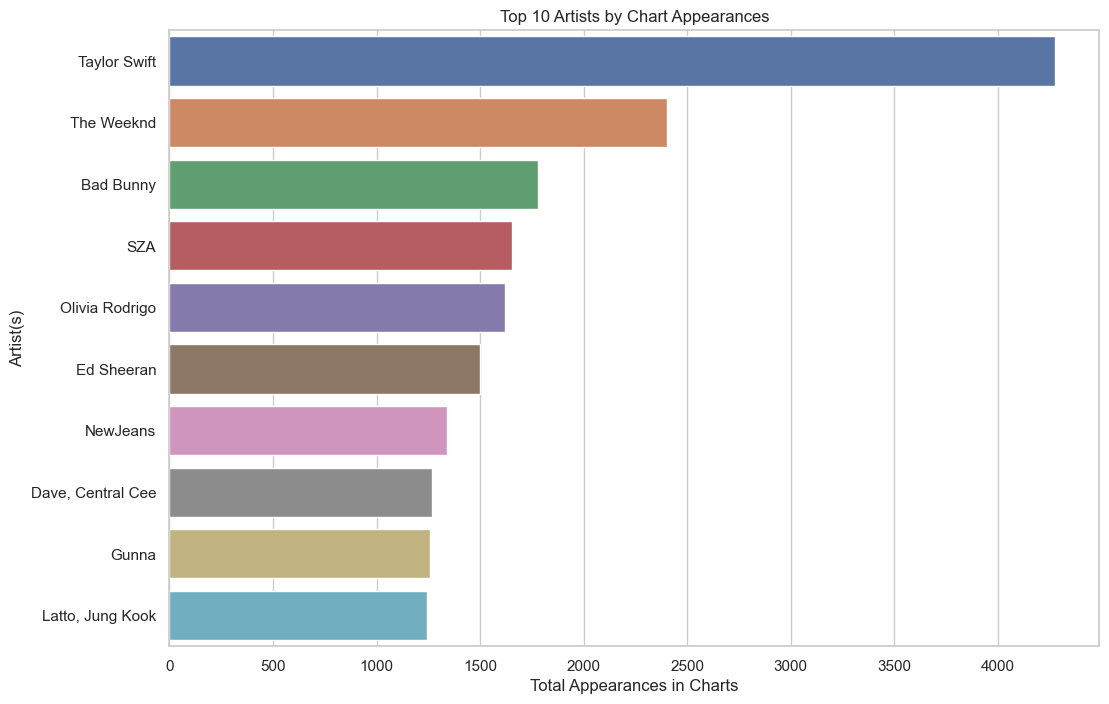

In [70]:
spot_df['in_shazam_charts'] = pd.to_numeric(spot_df['in_shazam_charts'], errors='coerce').fillna(0).astype(int)

chart_columns = ['in_deezer_charts', 'in_shazam_charts', 'in_spotify_charts', 'in_apple_charts']

artist_chart_counts = spot_df.groupby('artist(s)_name')[chart_columns].sum()

artist_chart_counts['total_chart_appearances'] = artist_chart_counts.sum(axis=1)

top_chart_artists = artist_chart_counts.sort_values(by='total_chart_appearances', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_chart_artists.index, x=top_chart_artists['total_chart_appearances'], hue=top_chart_artists.index, dodge=False, legend=False)
plt.title('Top 10 Artists by Chart Appearances')
plt.xlabel('Total Appearances in Charts')
plt.ylabel('Artist(s)')
plt.show()